In [1]:
import sys
from pathlib import Path
import ProbabilisticParcellation.functional_profiles as fp
import ProbabilisticParcellation.hierarchical_clustering as cl
import ProbabilisticParcellation.similarity_colormap as cm
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import ProbabilisticParcellation.functional_profiles as fp
import pandas as pd
import seaborn as sb
import ProbabilisticParcellation.scripts.atlas_paper.feature_model as fm
from ProbabilisticParcellation.scripts.atlas_paper.ridge_reg import ridgeFit
import numpy as np
import nitools as nt
import os
import ProbabilisticParcellation.util as ut



## Explore task differences

In [2]:
Data, regions = fm.load_profiles()
tags = fm.load_features()
tags_individ = fm.subject_features(tags, Data)
task_matrix, task_codes = fm.task_indicator(Data)
tags_task = np.concatenate(
    (tags_individ.T.to_numpy(), task_matrix), axis=1)

Data_norm, tags_norm = fm.normalize(Data[regions], tags_task)

# Ridge regression
R2, Features = ridgeFit(Data_norm.to_numpy(), tags_norm,
                        fit_intercept=False, voxel_wise=False, alpha=1.0)


In [3]:
# Make dataframe
Features = pd.DataFrame(Features.T, columns=[
    'left_hand', 'right_hand', 'saccades'] + list(task_codes.keys()), index=regions)

# Plot
cmap = plt.get_cmap('RdBu_r')

In [4]:
# Melt
T = Features.reset_index().melt(id_vars='index', value_vars=Features.columns.tolist(),
                         var_name='task', value_name='score')

# make index into column
T['region'] = T['index']
# # Split region into side and region
T['side'] = T.region.str[-1]
T['reg'] = T.region.str[0:2]


# Localizing regions or domains
## Tasks that dissociate sociolinguistic S4 from other S regions

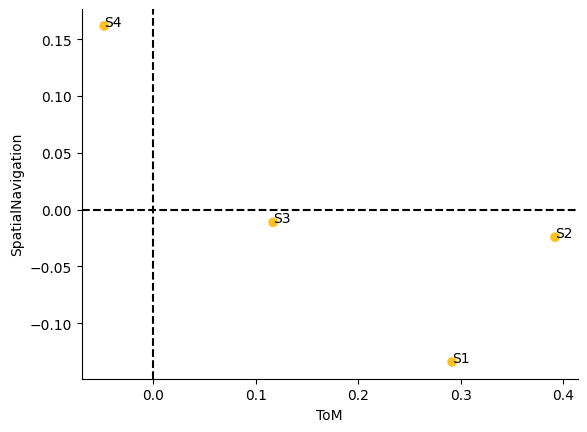

In [11]:
compare = ['ToM', 'SpatialNavigation']
fm.scatter_plot_tasks(compare, T[ T.reg.isin(['S1', 'S2', 'S3', 'S4'])],
                      ignore_side=True, color='domains')
plt.savefig(ut.figure_dir +
            f'localizers_regions-S_{compare[0]}_{compare[1]}.pdf', dpi=300)


## Tasks that dissociate sociolinguistic S1 and other S regions

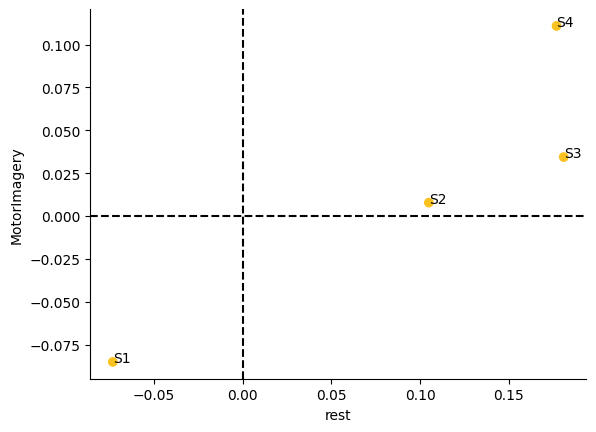

In [12]:
compare = ['rest', 'MotorImagery']
fm.scatter_plot_tasks(compare, T[ T.reg.isin(['S1', 'S2', 'S3', 'S4'])],
                      ignore_side=True, color='domains')
plt.savefig(ut.figure_dir +
            f'localizers_regions-S_{compare[0]}_{compare[1]}.pdf', dpi=300)


## Tasks that dissociate right sociolinguistic (S) and right demand (D) regions

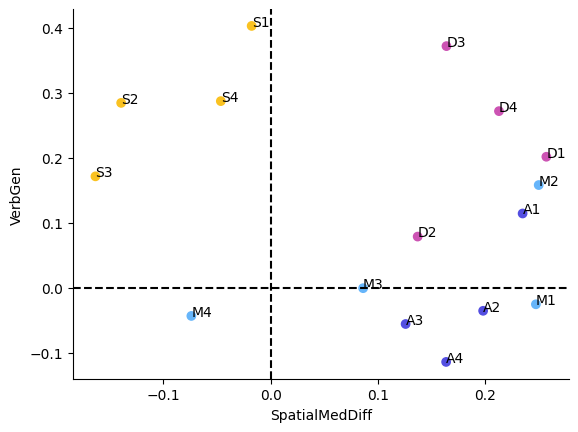

In [7]:
compare = ['SpatialMedDiff', 'VerbGen']
fm.scatter_plot_tasks(compare, T[T.side == 'R'],
                      ignore_side=True, color='domains')
plt.savefig(ut.figure_dir +
            f'localizers_domains-D-S_{compare[0]}_{compare[1]}_right.pdf', dpi=300)


## Tasks that dissociate left sociolinguistic (S) and left demand (D) regions

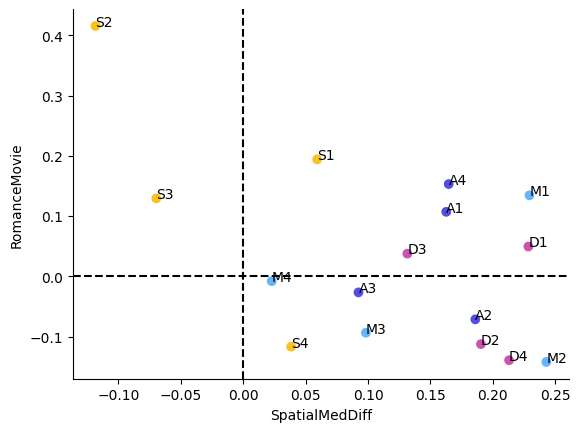

In [8]:
compare = ['SpatialMedDiff', 'RomanceMovie']
fm.scatter_plot_tasks(compare, T[T.side == 'L'],
                      ignore_side=True, color='domains')
plt.savefig(ut.figure_dir +
            f'localizers_domains-D-S_{compare[0]}_{compare[1]}_left.pdf', dpi=300)
